In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from google.colab import files

uploaded_file = files.upload()

Saving CSI_Data.csv to CSI_Data (1).csv


In [7]:
df = pd.read_csv('CSI_Data.csv')

The Data we have:

  - Name
  - Age
  - Height (cm)
  - Weight (kg)
  - Suspicion Level         (similar previous convitctions)
  - Number of Witnesses Backing the Alibi
  - Motive Points           (any grudges or previous disputes with the victim)
  - Alibi Duration
  - Criminal Record Points  (ALL previous convictions)
  - Weapon Points           (cases of illegal weapon possessions)
  - Vehicle Points          (do they have a registered vehicle?)

In [8]:
df.head()

,Unnamed: 0,Name,Age,Height_cm,Weight_kg,Suspicion_Level,Number_of_Witnesses,Motive_Points,Alibi_Duration_hours,Criminal_Record_Points,Weapon_Points,Vehicle_Points
0,0,John 'Whiskey Jack' Johnson,46,130,84,3,3.0,6,20,1,5,5
1,1,Maggie 'Moonshine' Malone,50,130,66,9,NaN,3,19,0,4,3
2,2,Frank 'Bootleg' Baker,43,160,85,8,3.0,3,7,9,4,9
3,3,Alice 'Alibi' Anderson,59,190,81,5,NaN,8,16,9,1,8
4,4,Tommy 'Two-Face' Thompson,37,158,87,2,3.0,5,19,9,0,0


In [12]:
df.describe()

,Unnamed: 0,Age,Height_cm,Weight_kg,Suspicion_Level,Number_of_Witnesses,Motive_Points,Alibi_Duration_hours,Criminal_Record_Points,Weapon_Points,Vehicle_Points
count,20.00000,20.000000,20.000000,20.000000,20.000000,14.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,9.50000,45.950000,167.000000,84.750000,6.250000,2.428571,7.400000,15.800000,5.450000,4.700000,6.600000
std,5.91608,27.970802,18.381913,42.354239,3.058637,0.755929,6.402302,6.485612,5.799047,3.599708,5.374403
min,0.00000,21.000000,130.000000,30.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,4.75000,28.750000,156.250000,64.500000,4.750000,2.000000,4.000000,11.750000,1.750000,1.000000,4.000000
50%,9.50000,40.500000,170.000000,76.500000,7.000000,3.000000,5.500000,18.000000,4.500000,4.500000,6.000000
75%,14.25000,55.750000,179.000000,87.250000,8.250000,3.000000,8.000000,20.250000,9.000000,7.250000,8.250000
max,19.00000,150.000000,200.000000,200.000000,10.000000,3.000000,25.000000,24.000000,25.000000,10.000000,25.000000


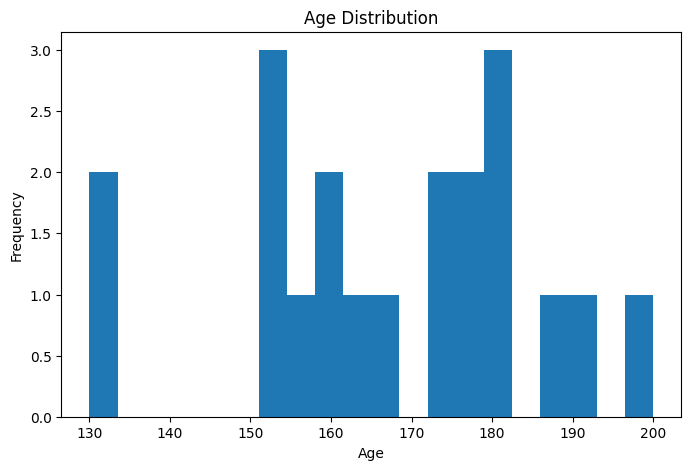

In [16]:
plt.figure(figsize = (8,5))
plt.hist( df['Height_cm'].dropna(), bins = 20)
plt.title(f"{'Age'} Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

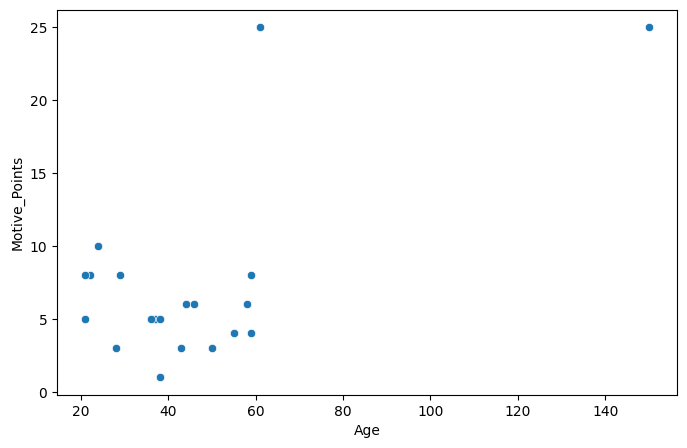

In [17]:
import seaborn as sns

col1 = 'Age'
col2 = 'Motive_Points'

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=col1, y=col2)
plt.show()

In [21]:
# Creating a composite score from our metrics, and then adding it to our dataframe
df['Composite Score'] = 0.4 * df['Motive_Points'] + 0.3 * df['Vehicle_Points'] - 0.3 * df['Weapon_Points'] + 0.2 * df['Criminal_Record_Points'] + 0.1 * df['Suspicion_Level']

In [25]:
# Creating a copy of the dataframe we just made, and then sorting it by the Composite Score we just implemented
df2 = df.sort_values(by='Composite Score', ascending=False)

#print(np.mean(df2[['Composite Score']]))

Composite Score    5.245
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


An alchohol smuggler was murdered! Here's what we know:

Witness Description:

- "A lean male?"
- 30 to 40 years old
- about 150cm tall
- didn't have a car at the crimescene

Detective Report:

- empty firearm magazines left at the scene (weapon was of an illegal model)
- uneven footsteps; boot tracks

In [28]:
df2[['Name','Age', 'Composite Score', 'Height_cm']]

,Name,Age,Composite Score,Height_cm
15,Samantha 'Sly' Sinclair,150,14.8,151
10,Max 'Moonshiner' Murphy,29,12.1,173
12,Eddie 'Evader' Edwards,61,11.8,154
3,Alice 'Alibi' Anderson,59,7.6,190
19,Laura 'Lager' Lawson,58,6.1,179
13,Olivia 'Outlaw' O'Connor,24,5.3,153
11,Grace 'Gin' Green,21,5.3,157
2,Frank 'Bootleg' Baker,43,5.3,160
7,Sarah 'Smuggler' Sanders,21,4.9,178
9,Lucy 'Liquor' Lee,22,4.3,182
